# 151 翻转字符串里的单词
输入：一个字符串，由多个单词和空格组成
要求：逐个翻转字符串中的每个单词  

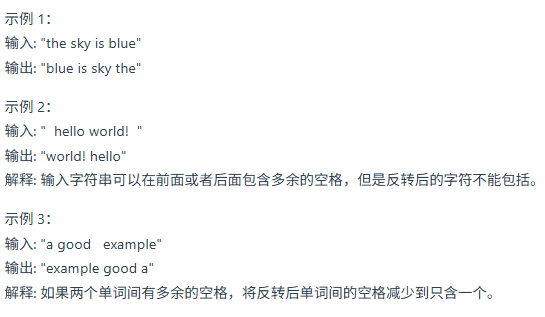

## 思路
- 移除多余的空格  
- 翻转整个字符串（包括单词里的字母）  
- 翻转每个单词中的字母（回复单词的正序）  

双指针法移除空格：O(n)时间复杂度  

实际上由 反转字符串、翻转子区间、移除元素 三个题构成  


### python的字符串是不可变的，不能修改
### 因此需要先转换为列表，再通过join()函数转换成字符串

In [ ]:
# 法1：字符串转换为列表后，双指针去除空格 
class Solution:
    # 单词内字母翻转
    def single_reverse(self, s, start:int, end:int):
        while start < end:
            s[start], s[end] = s[end], s[start]
            start += 1
            end -= 1

    # 整体反转
    def reverseWords(self, s:str) -> str:
        result = ""  # 新字符串初始化
        fast = 0
        # 1. 先将字符串反转并除掉空格，然后加入到新的字符串中
        s = list(s)
        s.reverse()  # 翻转整个字符串
        while fast < len(s):
            if s[fast] != " ":  # 遇到非空格才处理（删除所有空格）
                if len(result) != 0:  # 单独加上单词之间的空格
                    result += " "
                # 内部循环：提取当前单词的所有字符，直到遇到空格或结束
                while s[fast] != " " and fast < len(s):
                    result += s[fast]
                    fast += 1
            else:
                fast += 1
        
        # 2. 最后将每个单词的字母翻转回正常顺序
        slow = 0  # 指向当前单词的起始位置
        fast = 0  # 指向当前单词的结束位置（空格 / 字符末尾）
        result = list(result)
        while fast <= len(result):   # fast遍历空格处理后的result
            if fast == len(result) or result[fast] == " ":
                slef.single_reverse(result, slow, fast - 1)
                slow = fast + 1   # 更新到下一个单词的起始位置，跳过空格
                fast += 1
            else:
                fast += 1
        
        return "".join(result)


In [ ]:
# 法2：删除空白，整体反转然后单词翻转
# split()函数能够自动忽略多余的空格
class Solution:
    def reverseWords(self, s:str) -> str:
        # 翻转整个字符串
        s = s[::-1]
        s = ' '.join(word[::-1] for word in s.split())
        return s

In [ ]:
# 法3：split()拆解 + 双指针
class Solution:
    def reverseWords(self, s:str) -> str:
        words = s.split()  # 拆分后即转换为list, 每个单词作为列表的一个元素

        # 翻转单词
        # 这里的指针指向的是单词整体
        # 也可以直接 words = words[::-1] # 反转单词
        left, right = 0, len(words) - 1
        while left < right:
            words[left], words[right] = words[right], words[left]
            left += 1
            right -= 1

        # 将列表转换成字符串
        return " ".join(words)